<a href="https://colab.research.google.com/github/NAEEM02825/NAEEM02825/blob/main/docs/tutorials/google/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!apt-get install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


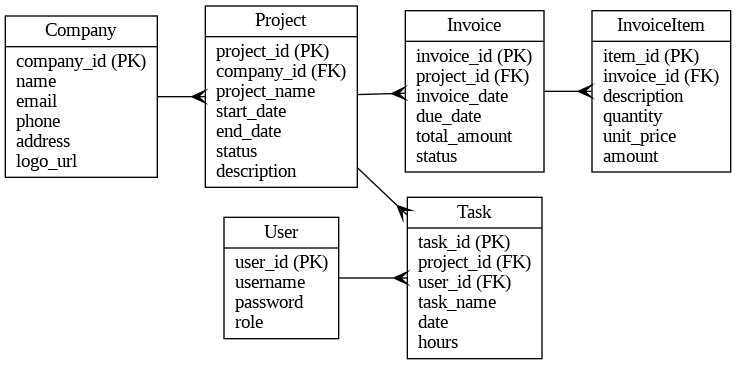

In [10]:
from graphviz import Digraph
from IPython.display import Image

# Create a new Digraph
erd = Digraph(name="Invoice_ERD", format='png')
erd.attr(rankdir='LR', size='8,5')

# Define nodes for entities
entities = {
    "Company": ["company_id (PK)", "name", "email", "phone", "address", "logo_url"],
    "Project": ["project_id (PK)", "company_id (FK)", "project_name", "start_date", "end_date", "status", "description"],
    "Invoice": ["invoice_id (PK)", "project_id (FK)", "invoice_date", "due_date", "total_amount", "status"],
    "InvoiceItem": ["item_id (PK)", "invoice_id (FK)", "description", "quantity", "unit_price", "amount"],
    "Task": ["task_id (PK)", "project_id (FK)", "user_id (FK)", "task_name", "date", "hours"],
    "User": ["user_id (PK)", "username", "password", "role"]
}

# Add entity nodes with attributes
for entity, attributes in entities.items():
    label = f"{entity}|" + "\\l".join(attributes) + "\\l"
    erd.node(entity, label=label, shape="record")

# Define relationships
relationships = [
    ("Company", "Project"),
    ("Project", "Invoice"),
    ("Invoice", "InvoiceItem"),
    ("Project", "Task"),
    ("User", "Task")
]


# Add edges to the graph
for from_entity, to_entity in relationships:
    erd.edge(from_entity, to_entity, arrowhead="crow", dir="forward")

# Render and display image
erd.render(filename='invoice_erd', format='png', cleanup=True)
Image(filename='invoice_erd.png')
